# 1. BUSINESS UNDERSTANDING

Business Understanding adalah tahap awal di mana dilakukan pemahaman terhadap masalah yang ingin dipecahkan dengan data mining dan definisi tujuan yang ingin dicapai.

Masalah: 
Untuk membeli rumah di US banyak sekali ragam variasi spesifikasi rumah seperti luas tanah, luas hunian, jumlah kamar, dll dengan harga yang bervariasi sehingga menyulitkan untuk mencari harga dengan spesifikasi yang dibutuhkan.

Tujuan:
Mempermudah bagi seseorang yang sedang mencari rumah di US dengan memasukan spesifikasi rumah yang diinginkan serta estimasi harga dari kebutuhan tersebut.

Dataset yang digunakan sebagai model didapatkan pada situs kggle.com (https://www.kaggle.com/datasets/shree1992/housedata). Pada situs ini kita dapat mencari berbagai macam dataset bahkan model yang kita inginkan.

# deskripsi library yang digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Memanggil Dataset

In [2]:
df = pd.read_csv('data.csv')

# 2. DATA UNDERSTANDING

Data Understanding merupakan tahap pengumpulan data dan analisis terhadap data untuk memahami karakteristik dan kualitas data.

# Deskripsi Dataset

In [3]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


Untuk melihat 5 baris pertama dari dataset. Disini kita dapat melihat atribut apa saja yang ada di dalam dataset.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

Untuk melihat tipe data untuk setiap artibut yang ada didalam dataset.

<Axes: >

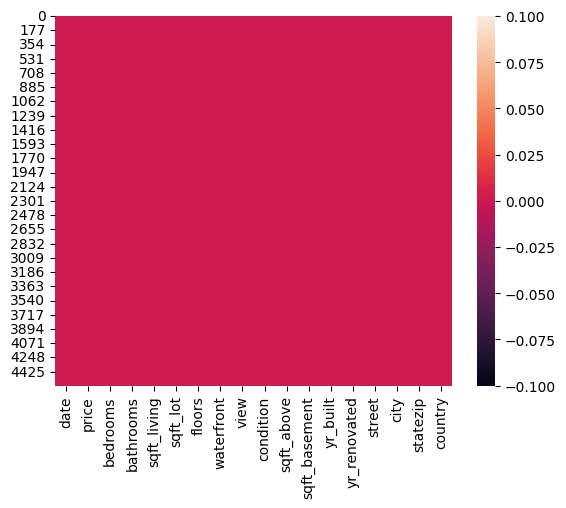

In [5]:
sns.heatmap(df.isnull())

Untuk melihat apakah ada nilai null atau kosong pada dataset. Pada dataset diatas bisa kita ketahui tidak ada missing data.

In [6]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


Untuk melihat gambaran dari setiap atribut pada dataset. Dari hasil diatas kita dapat mengetahui mulai dari bayaknya data, rata rata, nilai penyebaran data dan nilai minimum dan maksimum dari setiap atributnya.

# 3. DATA PREPARATION

Data Preparation adalah tahap persiapan data, termasuk pemilihan data yang relevan, membersihkan data dari data yang tidak diperlukan atau data yang hilang, dan penggabungan data.

# Visualisasi Data

C:\Users\ACER-I5\AppData\Local\Temp\ipykernel_10048\2675538813.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

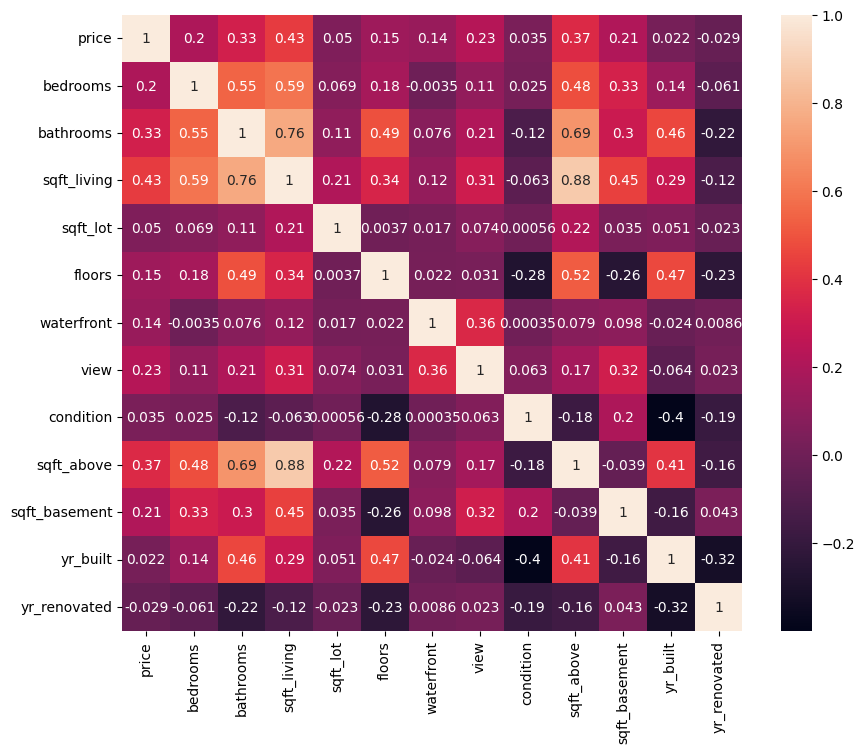

In [7]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

Menampilkan atribut atribut yang menggunakan data numberic. Ini berguna untuk menyeleksi atribut apa saja yang akan digunakan untuk analisis estimasi.

# Jumlah rumah berdasarkan kota

In [19]:
models = df.groupby('city').count()[['sqft_lot']].sort_values(by='sqft_lot',ascending=True).reset_index()
models = models.rename(columns={'sqft_lot':'Jumlah Rumah'})

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43]),
 [Text(0, 0, 'Snoqualmie Pass'),
  Text(1, 0, 'Beaux Arts Village'),
  Text(2, 0, 'Inglewood-Finn Hill'),
  Text(3, 0, 'Preston'),
  Text(4, 0, 'Milton'),
  Text(5, 0, 'Skykomish'),
  Text(6, 0, 'Yarrow Point'),
  Text(7, 0, 'Algona'),
  Text(8, 0, 'Pacific'),
  Text(9, 0, 'Ravensdale'),
  Text(10, 0, 'Black Diamond'),
  Text(11, 0, 'Clyde Hill'),
  Text(12, 0, 'Fall City'),
  Text(13, 0, 'Medina'),
  Text(14, 0, 'Normandy Park'),
  Text(15, 0, 'Carnation'),
  Text(16, 0, 'Enumclaw'),
  Text(17, 0, 'Vashon'),
  Text(18, 0, 'Tukwila'),
  Text(19, 0, 'SeaTac'),
  Text(20, 0, 'Bothell'),
  Text(21, 0, 'Newcastle'),
  Text(22, 0, 'Lake Forest Park'),
  Text(23, 0, 'Duvall'),
  Text(24, 0, 'Covington'),
  Text(25, 0, 'North Bend'),
  Text(26, 0, 'Des Moines'),
  Text(27, 0, 'Kenmore'),
  Text

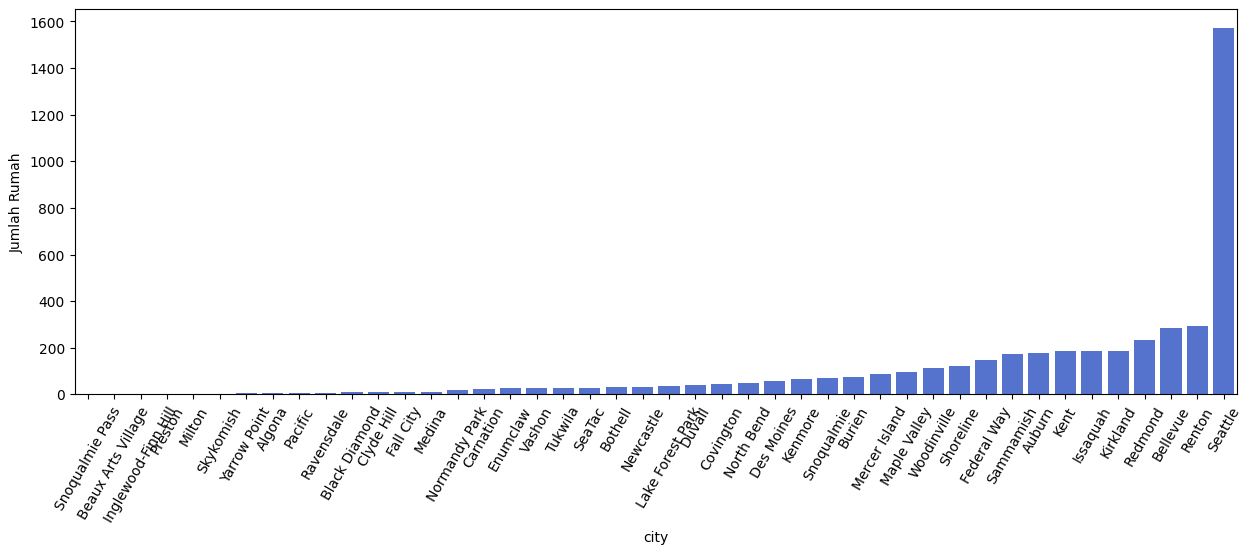

In [20]:
fig = plt.figure(figsize=(15,5))
sns.barplot(x=models['city'], y=models['Jumlah Rumah'], color='royalblue')
plt.xticks(rotation=60)

# distribusi harga rumah

C:\Users\ACER-I5\AppData\Local\Temp\ipykernel_10048\3048279456.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'])


<Axes: xlabel='price', ylabel='Density'>

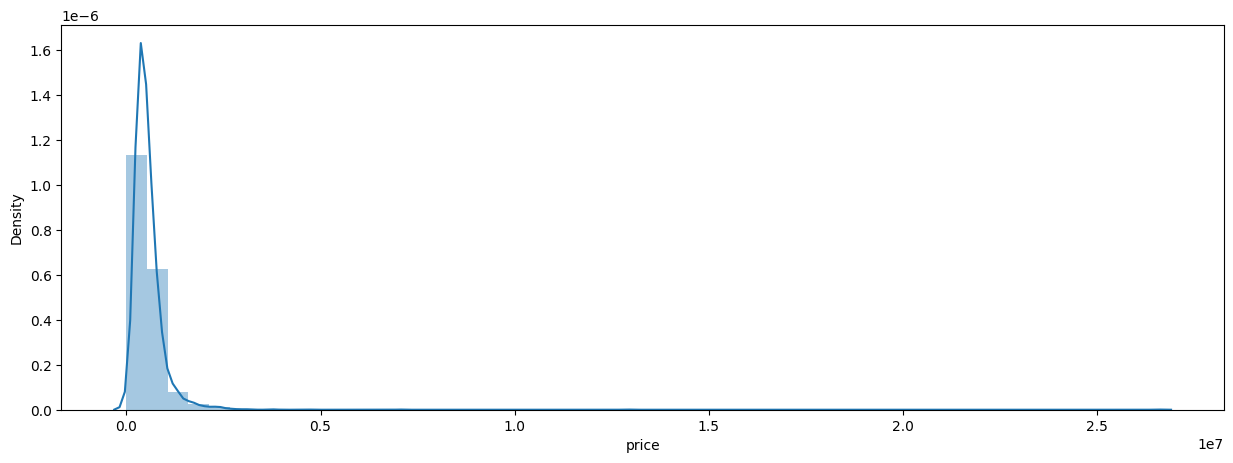

In [28]:
plt.figure(figsize=(15,5))
sns.distplot(df['price'])

# 4. MODELING

Modeling merupakan tahap membangun model atau algoritma yang sesuai untuk menyelesaikan masalah dan menguji model tersebut.

# seleksi fitur

In [29]:
features = ['sqft_lot','sqft_living','bedrooms','bathrooms','floors']
x = df[features]
y = df['price']
x.shape, y.shape

((4600, 5), (4600,))

Untuk menyeleksi fitur apa saja yang akan digunakan sebagai inputan untuk melakukan estimasi.

x atau lebel/target --> price

y atau features --> sqft_lot, sqft_living, bedrooms, bathrooms, floors


setelah dijalankan kita dapat melihat bahwa x yang di dapat sebanyak 4600 baris dan 5 kolom (berdasarkan feature yang dimasukan) dan y sebanyak 4600 baris dan 1 kolom 
(berdasarkan label yang dimasukan).

# split data training dan data testing

In [23]:
from sklearn.model_selection import train_test_split
x_train, X_test, y_train, y_test = train_test_split(x,y,random_state=70)
y_test.shape

(1150,)

Membagi data untuk training dan testing. Setelah dijalankan kita dapat melihat bahwa jumlah data testing yang diambil sebanyak 1150 dari total keseluruhan data yang didapat dengan jumlah 4600. 

# membuat model regresi linier

In [24]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)
pred = lr.predict(X_test)

Membuat model regresi dengan data testing yang diperoleh sebelumnya.

In [25]:
score = lr.score(X_test, y_test)
print('akurasi model regresi linier = ', score)

akurasi model regresi linier =  0.45994902463870535


Untuk mengetahui akurasi model liner. Dari hasil yang didapat kita dapat mengetahui akurasi dari model regresi tersebut sebesar 0.0.45994902463870535 atau sebesar 46%.

# 5. EVALUATION

Evaluation adalah tahap evaluasi hasil model, apakah model yang dibangun sudah berhasil memecahkan masalah bisnis atau belum.

# membuat inputan model regresi linier

In [26]:
input_data = np.array([[7000,1500,2,1,1]])

prediction = lr.predict(input_data)
print('Estimasi harga Rumah dalam USD :', prediction)

Estimasi harga Rumah dalam USD : [437439.64931355]


c:\Users\ACER-I5\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Membuat estimasi berdasarkan model linear sebelumnya. Dari hasil diatas dengan menginputkan data sesuai dengan features yang kita masukan sebelumnya kita memperoleh esimasi harga rumah sebesar 437439.64931355 USD

# 6. DEPLOYMENT

Deployment merupakan tahap implementasi hasil model ke dalam sistem bisnis dan melakukan pemantauan terhadap model yang diimplementasikan.

# save model

In [27]:
import pickle

filename = 'estimasi_rumah.sav'
pickle.dump(lr,open(filename,'wb'))

Menyimpan model yang nantinya akan dihosting menggunakan streamlit.